<a href="https://colab.research.google.com/github/NadiaHolmlund/BDS_M1_Exam/blob/main/BDS_M1_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experience JobHunter
## Streamlit
Please click the following link to visit JobHunter on streamlit: 
https://nadiaholmlund-testing-m1-jobs-testing-jobs-app-z9r0jz.streamlitapp.com/
## Executive pitch slide-deck
Please explore the JobHunter pitch in PowerPoint ***presentation mode*** to get the full experience.

# Imports

In [1]:
# Pip installs
!pip install pydeck -q
#!pip install scikit-learn==1.1.2 -q

# Data manipulation
import pandas as pd #for manipulating data
import numpy as np #for manipulating data

# Dataviz
import plotly.express as px

# Geoplotting
import pydeck as pdk

# UML
import scipy.sparse as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_distances

# SML
import functools as ft
from functools import reduce
from numpy import asarray # for ordinal
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split  
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

     |████████████████████████████████| 4.3 MB 5.4 MB/s 
     |████████████████████████████████| 1.6 MB 62.6 MB/s 


In [2]:
# import all of our datafiles
user_int = pd.read_csv('https://raw.githubusercontent.com/NadiaHolmlund/BDS_M1_Exam/main/Data/user_work_interest.csv')  
user_view = pd.read_csv('https://raw.githubusercontent.com/NadiaHolmlund/BDS_M1_Exam/main/Data/user_job_views.csv')
jobs = pd.read_csv('https://raw.githubusercontent.com/NadiaHolmlund/BDS_M1_Exam/main/Data/jobs.csv')
user_exp = pd.read_csv('https://raw.githubusercontent.com/NadiaHolmlund/BDS_M1_Exam/main/Data/user_past_experience.csv')

# Data & Cleaning

## **jobs.csv**

In [3]:
# First we check the shape of the data.
jobs.shape

(84090, 22)

In [4]:
# Secondly we check the dataset for what object is.
jobs

Job.ID  Provider Status  \
0         111         1   open   
1         113         1   open   
2         117         1   open   
3         121         1   open   
4         127         1   open   
...       ...       ...    ...   
84085      82         1   open   
84086      83         1   open   
84087      84         1   open   
84088      88         1   open   
84089      92         1   open   

                                                    Slug  \
0                        palo-alto-ca-tacolicious-server   
1        san-francisco-ca-claude-lane-kitchen-staff-chef   
2      san-francisco-ca-machka-restaurants-corp-barte...   
3                      brisbane-ca-teriyaki-house-server   
4      los-angeles-ca-rosa-mexicano-sunset-kitchen-st...   
...                                                  ...   
84085  san-francisco-ca-national-japanese-american-hi...   
84086       larkspur-ca-emporio-rulli-kitchen-staff-chef   
84087                san-francisco-ca-onigilly-driver-84   
84088  san-francisco-ca-machka-restaurants-corp-line-...   
84089               san-jose-ca-kazoo-restaurant-cashier   

                                                   Title            Position  \
0                                   Server @ Tacolicious              Server   
1                       Kitchen Staff/Chef @ Claude Lane  Kitchen Staff/Chef   
2                   Bartender @ Machka Restaurants Corp.           Bartender   
3                                Server @ Teriyaki House              Server   
4            Kitchen Staff/Chef @ Rosa Mexicano - Sunset  Kitchen Staff/Chef   
...                                                  ...                 ...   
84085  Book Keeper @ National Japanese American Histo...         Book Keeper   
84086                 Kitchen Staff/Chef @ Emporio Rulli  Kitchen Staff/Chef   
84087                                  Driver @ Onigilly              Driver   
84088               Line Cook @ Machka Restaurants Corp.           Line Cook   
84089                         Cashier @ Kazoo Restaurant             Cashier   

                                             Company           City  \
0                                        Tacolicious      Palo Alto   
1                                        Claude Lane  San Francisco   
2                           Machka Restaurants Corp.  San Francisco   
3                                     Teriyaki House       Brisbane   
4                             Rosa Mexicano - Sunset    Los Angeles   
...                                              ...            ...   
84085  National Japanese American Historical Society  San Francisco   
84086                                  Emporio Rulli       Larkspur   
84087                                       Onigilly  San Francisco   
84088                       Machka Restaurants Corp.  San Francisco   
84089                               Kazoo Restaurant       San Jose   

       State.Name State.Code  ...   Longitude               Industry  \
0      California         CA  ... -122.161170     Food and Beverages   
1      California         CA  ... -122.404268     Food and Beverages   
2      California         CA  ... -122.402963     Food and Beverages   
3      California         CA  ... -122.400275     Food and Beverages   
4      California         CA  ... -118.460439     Food and Beverages   
...           ...        ...  ...         ...                    ...   
84085  California         CA  ... -122.429495  Office Administration   
84086  California         CA  ... -122.535025     Food and Beverages   
84087  California         CA  ... -122.404413     Food and Beverages   
84088  California         CA  ... -122.402963     Food and Beverages   
84089  California         CA  ... -121.893302     Food and Beverages   

       Requirements Salary  Listing.Start  Listing.End Employment.Type  \
0               NaN   8.00            NaN          NaN       Part-Time   
1               NaN   0.00            NaN         

In [5]:
# Checking how the data looks: From the data, we see that there are several columns with NaN values, such as; Requirements, Listing.Start, Listing.End. 

jobs.head()

Job.ID  Provider Status                                               Slug  \
0     111         1   open                    palo-alto-ca-tacolicious-server   
1     113         1   open    san-francisco-ca-claude-lane-kitchen-staff-chef   
2     117         1   open  san-francisco-ca-machka-restaurants-corp-barte...   
3     121         1   open                  brisbane-ca-teriyaki-house-server   
4     127         1   open  los-angeles-ca-rosa-mexicano-sunset-kitchen-st...   

                                         Title            Position  \
0                         Server @ Tacolicious              Server   
1             Kitchen Staff/Chef @ Claude Lane  Kitchen Staff/Chef   
2         Bartender @ Machka Restaurants Corp.           Bartender   
3                      Server @ Teriyaki House              Server   
4  Kitchen Staff/Chef @ Rosa Mexicano - Sunset  Kitchen Staff/Chef   

                    Company           City  State.Name State.Code  ...  \
0               Tacolicious      Palo Alto  California         CA  ...   
1               Claude Lane  San Francisco  California         CA  ...   
2  Machka Restaurants Corp.  San Francisco  California         CA  ...   
3            Teriyaki House       Brisbane  California         CA  ...   
4    Rosa Mexicano - Sunset    Los Angeles  California         CA  ...   

    Longitude            Industry  Requirements Salary  Listing.Start  \
0 -122.161170  Food and Beverages           NaN   8.00            NaN   
1 -122.404268  Food and Beverages           NaN   0.00            NaN   
2 -122.402963  Food and Beverages           NaN  11.00            NaN   
3 -122.400275  Food and Beverages           NaN  10.55            NaN   
4 -118.460439  Food and Beverages           NaN  10.55            NaN   

   Listing.End Employment.Type Education.Required               Created.At  \
0          NaN       Part-Time                NaN  2013-03-12 02:08:28 UTC   
1          NaN       Part-Time                NaN  2013-04-12 08:36:36 UTC   
2          NaN       Part-Time                NaN  2013-07-16 09:34:10 UTC   
3          NaN       Part-Time                NaN  2013-09-04 15:40:30 UTC   
4          NaN       Part-Time                NaN  2013-07-17 15:26:18 UTC   

                Updated.At  
0  2014-08-16 15:35:36 UTC  
1  2014-08-16 15:35:36 UTC  
2  2014-08-16 15:35:37 UTC  
3  2014-08-16 15:35:38 UTC  
4  2014-08-16 15:35:40 UTC  

[5 rows x 22 columns]

In [6]:
# We will look through the data to see to what extend we have missing values next.
# We use sum() and sort_values to get a descending list.
jobs.isna().sum().sort_values()

Job.ID                    0
Longitude                 0
Latitude                  0
Created.At                0
Position                  0
Updated.At                0
Slug                      0
Status                    0
Provider                  0
Title                     0
Employment.Type          10
City                    135
Listing.End             167
State.Name              171
State.Code              171
Education.Required      267
Listing.Start           683
Company                2271
Industry              83823
Salary                83861
Address               84054
Requirements          84090
dtype: int64

In [7]:
# Looking here, we can see 4 columns that are irellevant, as they are mostly empty. These are: Salary, Industry, Requirements and Address
# We therefore elect to drop them from the dataset. 
jobs = jobs.drop(['Industry', 'Salary', 'Address', 'Requirements'], axis=1)

In [8]:
# We check that we successfully dropped the columns.
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              84090 non-null  int64  
 1   Provider            84090 non-null  int64  
 2   Status              84090 non-null  object 
 3   Slug                84090 non-null  object 
 4   Title               84090 non-null  object 
 5   Position            84090 non-null  object 
 6   Company             81819 non-null  object 
 7   City                83955 non-null  object 
 8   State.Name          83919 non-null  object 
 9   State.Code          83919 non-null  object 
 10  Latitude            84090 non-null  float64
 11  Longitude           84090 non-null  float64
 12  Listing.Start       83407 non-null  object 
 13  Listing.End         83923 non-null  object 
 14  Employment.Type     84080 non-null  object 
 15  Education.Required  83823 non-null  object 
 16  Crea

In [9]:
# As we see, there are still values which are NaN, as they don't constitute a large part of the dataset, we elect to remove those as well.
jobs.isna().sum().sort_values()

Job.ID                   0
Longitude                0
Latitude                 0
Created.At               0
Position                 0
Updated.At               0
Slug                     0
Status                   0
Provider                 0
Title                    0
Employment.Type         10
City                   135
Listing.End            167
State.Code             171
State.Name             171
Education.Required     267
Listing.Start          683
Company               2271
dtype: int64

In [10]:
# We drop all the null values.
jobs = jobs.dropna()

In [11]:
# Our total dataset row-size ends up being 80865, which is acceptable, as it is not even a 10% loss of data. 
jobs.shape

(80865, 18)

In [12]:
# We check the data-types of each variable.
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80865 entries, 8 to 83980
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              80865 non-null  int64  
 1   Provider            80865 non-null  int64  
 2   Status              80865 non-null  object 
 3   Slug                80865 non-null  object 
 4   Title               80865 non-null  object 
 5   Position            80865 non-null  object 
 6   Company             80865 non-null  object 
 7   City                80865 non-null  object 
 8   State.Name          80865 non-null  object 
 9   State.Code          80865 non-null  object 
 10  Latitude            80865 non-null  float64
 11  Longitude           80865 non-null  float64
 12  Listing.Start       80865 non-null  object 
 13  Listing.End         80865 non-null  object 
 14  Employment.Type     80865 non-null  object 
 15  Education.Required  80865 non-null  object 
 16  Crea

In [13]:
# Change We change the columns which correspond to date, from object to timebased. 

jobs['Listing.Start'] = pd.to_datetime(jobs['Listing.Start'])
jobs['Listing.End'] = pd.to_datetime(jobs['Listing.End'])

In [14]:
# We do the same for the Created and Updated columns
jobs['Created.At'] = pd.to_datetime(jobs['Created.At'])
jobs['Updated.At'] = pd.to_datetime(jobs['Updated.At'])

In [15]:
# We add a column to the jobs dataframe that extracts the date (and not time of day) from the Created.At column
jobs['Date'] = pd.to_datetime(jobs['Created.At']).dt.date

In [16]:
# We check to make sure that the formats have been changed correctly, and see that Listing columns are correctly formatted. 
# This is also the case for Created columns, and the time of day has been correctly taken into account
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80865 entries, 8 to 83980
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Job.ID              80865 non-null  int64              
 1   Provider            80865 non-null  int64              
 2   Status              80865 non-null  object             
 3   Slug                80865 non-null  object             
 4   Title               80865 non-null  object             
 5   Position            80865 non-null  object             
 6   Company             80865 non-null  object             
 7   City                80865 non-null  object             
 8   State.Name          80865 non-null  object             
 9   State.Code          80865 non-null  object             
 10  Latitude            80865 non-null  float64            
 11  Longitude           80865 non-null  float64            
 12  Listing.Start       80865 non-nu

In [17]:
# We chose to look into Employment.Type and Education.Required, as those two don't have a massive amount of unique values. 
jobs['Employment.Type'].unique()

array(['Part-Time', 'Full-Time/Part-Time', 'Seasonal/Temp', 'Per Diem',
       'Intern', 'Full-Time'], dtype=object)

In [18]:
# As we can see, there are some lables that are duplicates, like "Temporary/seasonal" and "Seasonal/Temp". 
# We combine the two into one label. 
jobs['Employment.Type'] = jobs['Employment.Type'].replace(['Seasonal/Temp'], 'Temporary/seasonal')

In [19]:
# We also change nan labels into str: Unspecified.
jobs['Employment.Type'] = jobs['Employment.Type'].fillna('Unspecified')

In [20]:
# Next we look at Education Required. Here we see that nan, Not Specified, are basically the same labels. 
jobs['Education.Required'].unique()

array(['Not Specified', 'High School Diploma', "Master's Degree",
       'Associate Degree', "Bachelor's Degree"], dtype=object)

In [21]:
# Here we fill the nan values with the value 'Unspecified', thereby converting it to a str-value.
jobs['Education.Required'] = jobs['Education.Required'].fillna('Unspecified')

In [22]:
# Next we replace 'Not Specified' with 'Unspecified' thereby collecting both labels into one label.
jobs['Education.Required'] = jobs['Education.Required'].replace(['Not Specified'] , 'Unspecified')

In [23]:
# Lastly we check that everything went according to plan.
jobs['Education.Required'].unique()

array(['Unspecified', 'High School Diploma', "Master's Degree",
       'Associate Degree', "Bachelor's Degree"], dtype=object)

In [24]:
jobs['Position'].value_counts().head(40)

Administrative Assistant                                                                     1372
Customer Service Representative                                                              1260
Accounts Payable Clerk                                                                        959
Accounting Clerk                                                                              941
Staff Accountant                                                                              907
Sales Representative / Sales Associate ( Entry Level )                                        906
Receptionist                                                                                  805
Bookkeeper                                                                                    634
Data Entry Clerk                                                                              612
Customer Service / Sales ( New Grads Welcome! )                                               551
Accounts Receivable 

In [25]:
# We group the positions that are similar to each other to create 11 overall categories

# Customer service
jobs['Position'] = jobs['Position'].replace(['Customer Service Representative'] , 'Customer Service')
jobs['Position'] = jobs['Position'].replace(['Customer Service / Sales ( New Grads Welcome!)'] , 'Customer Service')
jobs['Position'] = jobs['Position'].replace(['Customer Service / Sales ( New Grads Welcome! )'] , 'Customer Service')
jobs['Position'] = jobs['Position'].replace(['Entry Level Sales / Customer Service – Part time / Full Time'] , 'Customer Service')

# Accounting
jobs['Position'] = jobs['Position'].replace(['Accounts Payable Clerk'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Accounting Clerk'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Accounts Receivable Clerk'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Bookkeeper'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Full Charge Bookkeeper'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Payroll Clerk'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Billing Clerk'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Payroll Administrator'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Staff Accountant'] , 'Accounting')
jobs['Position'] = jobs['Position'].replace(['Senior Accountant'] , 'Accounting')

# Sales
jobs['Position'] = jobs['Position'].replace(['Sales Representative / Sales Associate ( Entry Level )'] , 'Sales')
jobs['Position'] = jobs['Position'].replace(['Sales Associate'] , 'Sales')
jobs['Position'] = jobs['Position'].replace(['Seasonal Wedding Sales Stylist'] , 'Sales')
jobs['Position'] = jobs['Position'].replace(['Retail Sales Associate - Part-Time'] , 'Sales')
jobs['Position'] = jobs['Position'].replace(['Retail Sales Associate'] , 'Sales')

# Administration
jobs['Position'] = jobs['Position'].replace(['Administrative Assistant'] , 'Administration')
jobs['Position'] = jobs['Position'].replace(['Receptionist'] , 'Administration')
jobs['Position'] = jobs['Position'].replace(['Front Desk Coordinator'] , 'Administration')
jobs['Position'] = jobs['Position'].replace(['Executive Assistant'] , 'Administration')
jobs['Position'] = jobs['Position'].replace(['General Office Clerk '] , 'Administration')
jobs['Position'] = jobs['Position'].replace(['Office Assistant'] , 'Administration')
jobs['Position'] = jobs['Position'].replace(['Medical Receptionist'] , 'Administration')



# Restaurant
jobs['Position'] = jobs['Position'].replace(['Bartender'] , 'Restaurant personnel')
jobs['Position'] = jobs['Position'].replace(['Server'] , 'Restaurant personnel')
jobs['Position'] = jobs['Position'].replace(['Kitchen Staff'] , 'Restaurant personnel')
jobs['Position'] = jobs['Position'].replace(['Hiring All Restaurant Positions - Servers - Cooks - Bartenders'] , 'Restaurant personnel')
jobs['Position'] = jobs['Position'].replace(['Cook'] , 'Restaurant personnel')
jobs['Position'] = jobs['Position'].replace(['Kitchen Staff'] , 'Restaurant personnel')


# Caregiving
jobs['Position'] = jobs['Position'].replace(['Caregiver / Home Health Aide / CNA'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Registered Nurse'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Home Health Aide'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Certified Nursing Assistant'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Entry Level Caregiver / Home Health Aide'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Caregiving'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Entry Level Caregiver'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Entry Level Healthcare Professionals wanted for Caregiver Opportunities'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Registered Nurse (RN) / Licensed Practical Nurse (LPN) - Healthcare Nursing Staff'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Licensed Practical Nurse - LPN'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Physical Therapist'] , 'Caregiving professional')
jobs['Position'] = jobs['Position'].replace(['Certified Nursing Assistant (CNA) - Healthcare Nursing Staff'] , 'Caregiving professional')

# Human resources
jobs['Position'] = jobs['Position'].replace(['Human Resources Assistant'] , 'Human resources')
jobs['Position'] = jobs['Position'].replace(['Human Resources Recruiter'] , 'Human resources')

# Retail professional
jobs['Position'] = jobs['Position'].replace(['Retail Sales Associate – Part-Time'] , 'Retail professional')
jobs['Position'] = jobs['Position'].replace(['Retail Sales Associate / Photographer'] , 'Retail professional')
jobs['Position'] = jobs['Position'].replace(['Retail Sales Associate - Part Time'] , 'Retail professional')
jobs['Position'] = jobs['Position'].replace(['Part Time Retail Merchandiser'] , 'Retail professional')
jobs['Position'] = jobs['Position'].replace(['Sales Representative - Retail'] , 'Retail professional')

# Teacher 
jobs['Position'] = jobs['Position'].replace(['Assistant Teacher'] , 'Teacher employee')
jobs['Position'] = jobs['Position'].replace(['Teacher'] , 'Teacher employee')

# Security officer
jobs['Position'] = jobs['Position'].replace(['Security Officer'] , 'Security officer')
jobs['Position'] = jobs['Position'].replace(['Security Officer - Regular'] , 'Security officer')

# Driver professional
jobs['Position'] = jobs['Position'].replace(['Part Time School Bus Drivers WANTED - Training Available'] , 'Driver professional')
jobs['Position'] = jobs['Position'].replace(['Delivery Driver (Part -Time)'] , 'Driver professional')
jobs['Position'] = jobs['Position'].replace(['School Bus Driver'] , 'Driver professional')
jobs['Position'] = jobs['Position'].replace(['Driver'] , 'Driver professional')



In [26]:
#We filter based on the categories above.
jobs = jobs[jobs['Position'].isin(['Customer Service', 'Accounting','Sales', 'Administration', 'Restaurant personnel', 'Caregiving professional', 'Human resources', 'Retail professional', 'Teacher employee','Security officer', 'Driver professional'])]

In [27]:
# We check the shape to see how reduced our new dataset is.
jobs['Position'].shape

(16574,)

## **user_job_views.csv**




In [28]:
# Next we do the same procedure for user_view, for the sake of brevity, i won't comment on things which follow the - 
# same procedure as above.
user_view = pd.read_csv('https://raw.githubusercontent.com/fr3drikk/the_dream_team-/main/App/Data/user_job_views.csv')

In [29]:
user_view.shape

(12370, 13)

In [30]:
user_view.head()

Applicant.ID  Job.ID                                              Title  \
0         10000   73666              Cashiers & Valets Needed! @ WallyPark   
1         10000   96655  Macy's Seasonal Retail Fragrance Cashier  - Ga...   
2         10001   84141  Part Time Showroom Sales / Cashier @ Grizzly I...   
3         10002   77989  Event Specialist Part Time @ Advantage Sales &...   
4         10002   69568          Bonefish - Kitchen Staff @ Bonefish Grill   

                       Company          City      State.Name State.Code  \
0                    WallyPark        Newark      New Jersey         NJ   
1                       Macy's   Garden City        New York         NY   
2      Grizzly Industrial Inc.    Bellingham      Washington         WA   
3  Advantage Sales & Marketing  Simpsonville  South Carolina         SC   
4               Bonefish Grill    Greenville  South Carolina         SC   

  Industry               View.Start                 View.End  View.Duration  \
0      NaN  2014-12-12 20:12:35 UTC  2014-12-12 20:31:24 UTC         1129.0   
1      NaN  2014-12-12 20:08:50 UTC  2014-12-12 20:10:15 UTC           84.0   
2      NaN  2014-12-12 20:12:32 UTC  2014-12-12 20:17:18 UTC          286.0   
3      NaN  2014-12-12 20:39:23 UTC  2014-12-12 20:42:13 UTC          170.0   
4      NaN  2014-12-12 20:43:25 UTC  2014-12-12 20:43:58 UTC           33.0   

                Created.At               Updated.At  
0  2014-12-12 20:12:35 UTC  2014-12-12 20:12:35 UTC  
1  2014-12-12 20:08:50 UTC  2014-12-12 20:08:50 UTC  
2  2014-12-12 20:12:32 UTC  2014-12-12 20:12:32 UTC  
3  2014-12-12 20:39:23 UTC  2014-12-12 20:39:23 UTC  
4  2014-12-12 20:43:25 UTC  2014-12-12 20:43:25 UTC

In [31]:
user_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12370 entries, 0 to 12369
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant.ID   12370 non-null  int64  
 1   Job.ID         12370 non-null  int64  
 2   Title          12370 non-null  object 
 3   Company        11790 non-null  object 
 4   City           12370 non-null  object 
 5   State.Name     12348 non-null  object 
 6   State.Code     12348 non-null  object 
 7   Industry       2199 non-null   object 
 8   View.Start     12370 non-null  object 
 9   View.End       10575 non-null  object 
 10  View.Duration  10575 non-null  float64
 11  Created.At     12370 non-null  object 
 12  Updated.At     12370 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


In [32]:
user_view.isna().sum().sort_values()

Applicant.ID         0
Job.ID               0
Title                0
City                 0
View.Start           0
Created.At           0
Updated.At           0
State.Name          22
State.Code          22
Company            580
View.End          1795
View.Duration     1795
Industry         10171
dtype: int64

In [33]:
# We remove industry as it is mostly null.
user_view = user_view.drop(['Industry'], axis=1)

In [34]:
# We fill our NA with a category of unspecified.
user_view['Company'] = user_view['Company'].fillna('Unspecified')

In [35]:
# we check again how many null values.
user_view.isna().sum().sort_values()

Applicant.ID        0
Job.ID              0
Title               0
Company             0
City                0
View.Start          0
Created.At          0
Updated.At          0
State.Name         22
State.Code         22
View.End         1795
View.Duration    1795
dtype: int64

In [36]:
user_view  = user_view.dropna(subset=['State.Name'])

In [37]:
# we calculate the mean of the duration and fill the missing values with it
user_view['View.Duration'] = user_view['View.Duration'].fillna(user_view['View.Duration'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# we change the form of created at, updated at, view start, view end, from objects to datetime
user_view['Created.At'] = pd.to_datetime(user_view['Created.At'])
user_view['Updated.At'] = pd.to_datetime(user_view['Updated.At'])

In [39]:
user_view['View.Start'] = pd.to_datetime(user_view['View.Start'])
user_view['View.End'] = pd.to_datetime(user_view['View.End'])

In [40]:
# it works : )
user_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12348 entries, 0 to 12369
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Applicant.ID   12348 non-null  int64              
 1   Job.ID         12348 non-null  int64              
 2   Title          12348 non-null  object             
 3   Company        12348 non-null  object             
 4   City           12348 non-null  object             
 5   State.Name     12348 non-null  object             
 6   State.Code     12348 non-null  object             
 7   View.Start     12348 non-null  datetime64[ns, UTC]
 8   View.End       10554 non-null  datetime64[ns, UTC]
 9   View.Duration  12348 non-null  float64            
 10  Created.At     12348 non-null  datetime64[ns, UTC]
 11  Updated.At     12348 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](4), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [41]:
# we decided to not care about view end, since we have view start and the duration, that is sufficient.
user_view['View.Duration'].head()

0    1129.0
1      84.0
2     286.0
3     170.0
4      33.0
Name: View.Duration, dtype: float64

In [42]:
# it works : )
user_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12348 entries, 0 to 12369
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Applicant.ID   12348 non-null  int64              
 1   Job.ID         12348 non-null  int64              
 2   Title          12348 non-null  object             
 3   Company        12348 non-null  object             
 4   City           12348 non-null  object             
 5   State.Name     12348 non-null  object             
 6   State.Code     12348 non-null  object             
 7   View.Start     12348 non-null  datetime64[ns, UTC]
 8   View.End       10554 non-null  datetime64[ns, UTC]
 9   View.Duration  12348 non-null  float64            
 10  Created.At     12348 non-null  datetime64[ns, UTC]
 11  Updated.At     12348 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](4), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [43]:
# it works : )
user_view.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12348 entries, 0 to 12369
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Applicant.ID   12348 non-null  int64              
 1   Job.ID         12348 non-null  int64              
 2   Title          12348 non-null  object             
 3   Company        12348 non-null  object             
 4   City           12348 non-null  object             
 5   State.Name     12348 non-null  object             
 6   State.Code     12348 non-null  object             
 7   View.Start     12348 non-null  datetime64[ns, UTC]
 8   View.End       10554 non-null  datetime64[ns, UTC]
 9   View.Duration  12348 non-null  float64            
 10  Created.At     12348 non-null  datetime64[ns, UTC]
 11  Updated.At     12348 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](4), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


## **user_past_experience.csv**

In [44]:
user_exp = pd.read_csv('https://raw.githubusercontent.com/fr3drikk/the_dream_team-/main/App/Data/user_past_experience.csv')

In [45]:
user_exp.shape

(8653, 13)

In [46]:
user_exp.head()

Applicant.ID                                      Position.Name  \
0         10001  Account Manager / Sales Administration / Quali...   
1         10001    Electronics Technician / Item Master Controller   
2         10001                                   Machine Operator   
3         10003                             maintenance technician   
4         10003                                 Electrical Helper    

               Employer.Name         City            State.Name State.Code  \
0         Barcode Resourcing   Bellingham            Washington         WA   
1                Ryzex Group   Bellingham            Washington         WA   
2                comptec inc       Custer            Washington         WA   
3           Winn residental    washington  District of Columbia         DC   
4  michael and son services   alexandria               Virginia         VA   

   Start.Date    End.Date                                    Job.Description  \
0  2012-10-15         NaN                                                NaN   
1  2001-12-01  2012-04-01                                                NaN   
2  1997-01-01  1999-01-01                                                NaN   
3         NaN         NaN  Necessary maintenance for "Make Ready" Plumbin...   
4         NaN         NaN    repair and services of electrical construction    

   Salary Can.Contact.Employer               Created.At  \
0     NaN                  NaN  2014-12-12 20:10:02 UTC   
1     NaN                  NaN  2014-12-12 20:10:02 UTC   
2     NaN                  NaN  2014-12-12 20:10:02 UTC   
3    10.0                False  2014-12-12 21:27:05 UTC   
4     NaN                False  2014-12-12 21:27:05 UTC   

                Updated.At  
0  2014-12-12 20:10:02 UTC  
1  2014-12-12 20:10:02 UTC  
2  2014-12-12 20:10:02 UTC  
3  2014-12-12 21:27:05 UTC  
4  2014-12-12 21:27:05 UTC

In [47]:
user_exp.isna().sum().sort_values()

Applicant.ID               0
Created.At                 0
Updated.At                 0
Employer.Name             33
Position.Name            950
Start.Date              2035
Job.Description         2961
City                    3731
End.Date                3747
State.Name              4058
State.Code              4058
Can.Contact.Employer    5072
Salary                  5855
dtype: int64

In [48]:
user_exp['Position.Name'].value_counts()

Cashier                                              129
Sales Associate                                      116
Server                                                86
Administrative Assistant                              76
Owner                                                 58
                                                    ... 
News Production Intern                                 1
Late Night with Jimmy Fallon -  Production Intern      1
Extern                                                 1
Cinematographer                                        1
Server/cocktail server/bartender                       1
Name: Position.Name, Length: 4986, dtype: int64

## **user_work_interest.csv**

In [49]:
user_int = pd.read_csv('https://raw.githubusercontent.com/fr3drikk/the_dream_team-/main/App/Data/user_work_interest.csv')

In [50]:
user_int['Position.Of.Interest'].value_counts().nlargest(10)

Customer Service Rep    1109
Receptionist            1070
Sales Rep                555
Server                   531
Host                     524
Book Keeper              494
Dishwasher               415
Bartender                186
Barista                  174
Line Cook                134
Name: Position.Of.Interest, dtype: int64

In [51]:
user_int['Position.Of.Interest'].value_counts().nlargest(20)

Customer Service Rep        1109
Receptionist                1070
Sales Rep                    555
Server                       531
Host                         524
Book Keeper                  494
Dishwasher                   415
Bartender                    186
Barista                      174
Line Cook                    134
Chef                          56
cashier                       47
Administrative Assistant      31
Cashier                       24
Data Entry                    20
data entry                    20
warehouse                     17
administrative assistant      16
clerical                      15
Security                      14
Name: Position.Of.Interest, dtype: int64

In [52]:
user_int.isna().sum().sort_values()

Applicant.ID            0
Created.At              0
Updated.At              0
Position.Of.Interest    2
dtype: int64

In [53]:
user_int.shape

(6560, 4)

In [54]:
user_int.head()

Applicant.ID Position.Of.Interest               Created.At  \
0         10003     security officer  2014-12-12 21:20:54 UTC   
1         10007               Server  2014-08-14 15:56:42 UTC   
2         10007            Bartender  2014-08-14 15:56:44 UTC   
3         10008                 Host  2014-08-14 15:56:42 UTC   
4         10008              Barista  2014-08-14 15:56:43 UTC   

                Updated.At  
0  2014-12-12 21:20:54 UTC  
1  2015-02-26 20:35:12 UTC  
2  2015-02-19 23:21:28 UTC  
3  2015-02-26 20:35:12 UTC  
4  2015-02-18 02:35:06 UTC

In [55]:
user_int['Applicant.ID'].nunique()

2068

# EDA

## Various metrics
In this section we calculate various metrics to provide overall facts regarding the job market.

In [56]:
# The View.Duration is a variable with possible outliers, so we'll check for these.
# The mean View.Duration is 2522 seconds pr. job post, equivalent to 42 minutes, which is quite high.
user_view['View.Duration'].mean()

2522.0601667614173

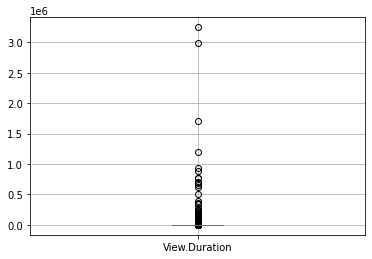

In [57]:
# We check the boxplot of the View.Duration and we notice that there are some outliers that could be heavily impacting this score.
user_view.boxplot('View.Duration')

In [58]:
# Here we mask every value in View.Duration that falls outside the 95th quantile and 05th quantile. If there are values as such, they will be changed to NaN
user_view['View.Duration'] = user_view['View.Duration'].mask(((user_view['View.Duration']< user_view['View.Duration'].quantile(0.05)) | (user_view['View.Duration'] > user_view['View.Duration'].quantile(0.95))), np.nan)

In [59]:
# Here we check how many values fell outside the quantile range.
user_view['View.Duration'].isna().sum()

847

In [60]:
# We import Sklearn SimpleImputer, to fill the missing values. 
from sklearn.impute import SimpleImputer

In [61]:
# We instantiate the simple imputer, to convert the values back to the median. The median is chosen since the mean is quite high.
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

In [62]:
user_view['View.Duration'] = imputer.fit_transform(user_view['View.Duration'].values.reshape(-1,1))[:,0]

In [63]:
user_view['View.Duration'].mean()

467.36985254049097

In [64]:
# We then calculate various metrics

# Open positions count the number of unique Job.IDs in the jobs dataset
open_positions = jobs['Job.ID'].nunique()

# Companies hiring counts the number of unique Company names in the jobs dataset
companies_hiring = jobs['Company'].nunique()

# Active jobhunters count the unique Applicant.IDs in the user_view dataset
active_jobhunters = user_view['Applicant.ID'].nunique()

# Avg. job posts viewed per jobhunter divides the total number of Job.IDs viewed by the number of unique Applicant.IDs in the user_view dataset and rounds the result to 2 decimals
avg_job_posts_viewed_per_jobhunter = (user_view['Job.ID'].value_counts().sum() / user_view['Applicant.ID'].nunique()).round(2)

# Avg. viewtime per job post calculates the mean View.Duration (with outliers excluded above) from the user_view dataset and converts it to minutes rounded by 2 decimals
avg_viewtime_per_job_post = (user_view['View.Duration'].mean() / 60).round(2)

In [65]:
# We then print the results of each calculation
print(open_positions)
print(companies_hiring)
print(active_jobhunters)
print(avg_job_posts_viewed_per_jobhunter)
print(avg_viewtime_per_job_post)

16574
707
3448
3.58
7.79


## Timeline based on employment type
In this section we calculate and create a timeline showing the number of jobs posted by employment type.

In [66]:
# Creating a pivot table with rows=Date, columns=Employment.Type and values=counts in order to visualize a timeline dividable by employment type
jobs_pivot = pd.pivot_table(jobs, values='Job.ID', index='Date', columns='Employment.Type', aggfunc='count')

In [67]:
# We check that the pivot table looks correct
jobs_pivot

Employment.Type  Full-Time/Part-Time  Part-Time  Per Diem  Temporary/seasonal
Date                                                                         
2014-12-05                       2.0        7.0       NaN                 1.0
2014-12-06                       8.0       23.0       4.0               155.0
2014-12-09                      17.0       42.0       6.0               276.0
2014-12-10                      22.0      449.0       2.0               168.0
2014-12-11                      12.0       35.0       1.0               178.0
...                              ...        ...       ...                 ...
2015-04-12                      13.0        6.0       NaN                26.0
2015-04-13                      12.0        6.0       NaN                 1.0
2015-04-14                      15.0       72.0       NaN               236.0
2015-04-15                     310.0       85.0       2.0               229.0
2015-04-16                      24.0       57.0       5.0               219.0

[68 rows x 4 columns]

In [68]:
# We then visualize the pivot table using plotly.express
jobs_pivot_plot = px.line(jobs_pivot)
jobs_pivot_plot.show()

## Timeline based on positions
In this section we calculate and create a timeline showing the number of jobs posted by position.

In [69]:
# Creating a pivot table with rows=Date, columns=Position and values=counts in order to visualize a timeline dividable by position
positions_pivot = pd.pivot_table(jobs, values='Job.ID', index='Date', columns='Position', aggfunc='count')

In [70]:
# We check that the pivot table looks correct
positions_pivot

Position    Accounting  Administration  Caregiving professional  \
Date                                                              
2014-12-05         NaN             2.0                      3.0   
2014-12-06        74.0            61.0                      7.0   
2014-12-09       144.0           100.0                     12.0   
2014-12-10        82.0            66.0                     14.0   
2014-12-11       105.0            59.0                     11.0   
...                ...             ...                      ...   
2015-04-12        21.0             4.0                      2.0   
2015-04-13         NaN             NaN                      NaN   
2015-04-14       126.0            79.0                     11.0   
2015-04-15       122.0            74.0                    117.0   
2015-04-16       117.0            70.0                     20.0   

Position    Customer Service  Driver professional  Human resources  \
Date                                                                 
2014-12-05               1.0                  NaN              NaN   
2014-12-06              27.0                  2.0              3.0   
2014-12-09              38.0                 11.0              8.0   
2014-12-10             222.0                  5.0              6.0   
2014-12-11              21.0                  5.0              4.0   
...                      ...                  ...              ...   
2015-04-12               1.0                  NaN              NaN   
2015-04-13               1.0                  NaN              1.0   
2015-04-14              25.0                  1.0              9.0   
2015-04-15              34.0                  9.0             13.0   
2015-04-16              29.0                  1.0             12.0   

Position    Restaurant personnel  Retail professional  Sales  \
Date                                                           
2014-12-05                   2.0                  NaN    2.0   
2014-12-06                   6.0                  NaN    9.0   
2014-12-09                  13.0                  NaN    7.0   
2014-12-10                   7.0                  NaN  222.0   
2014-12-11                   4.0                 13.0    2.0   
...                          ...                  ...    ...   
2015-04-12                   2.0                  3.0    5.0   
2015-04-13                   5.0                  3.0    9.0   
2015-04-14                   8.0                 47.0   17.0   
2015-04-15                  19.0                 17.0  201.0   
2015-04-16                   5.0                 28.0   20.0   

Position    Security officer  Teacher employee  
Date                                            
2014-12-05               NaN               NaN  
2014-12-06               1.0               NaN  
2014-12-09               4.0               4.0  
2014-12-10              12.0               5.0  
2014-12-11               NaN               2.0  
...                      ...               ...  
2015-04-12               6.0               1.0  
2015-04-13               NaN               NaN  
2015-04-14               NaN               NaN  
2015-04-15               6.0              14.0  
2015-04-16               3.0               NaN  

[68 rows x 11 columns]

In [71]:
# We then visualize the pivot table using plotly.express
positions_pivot_plot = px.line(positions_pivot)
positions_pivot_plot.show()

## Top five companies
In this section we identify the top five companies with most job posts

In [72]:
# We identify the top five companies with most job posts by using nlargest(5)
top_5_companies = jobs['Company'].value_counts().nlargest(5)
top_5_companies

Accountemps                 5090
OfficeTeam                  4365
Vector Marketing            1660
MarketSource                 858
Home Instead Senior Care     702
Name: Company, dtype: int64

In [73]:
# We then visualize the top five companies in a bar chart using plotly.express
top_5_companies_plot = px.bar(top_5_companies)
top_5_companies_plot.show()

## Top five positions
In this section we identify the top five positions with most job posts

In [74]:
# We identify the top five positions with most job posts by using nlargest(5)
top_5_positions = jobs['Position'].value_counts().nlargest(5)
top_5_positions

Accounting                 5154
Administration             3195
Customer Service           2052
Sales                      1799
Caregiving professional    1362
Name: Position, dtype: int64

In [75]:
# We then visualize the top five positions in a bar chart using plotly.express
top_5_positions_plot = px.bar(top_5_positions)
top_5_positions_plot.show()

## Geoplotting with PyDeck
In this section we plot all of the job postings on a map using the longitude and latitude provided in the jobs dataset

In [76]:
# We will use pydeck to visualize the map

# First the define the map by adding a layer
layer = pdk.Layer(
        "ScatterplotLayer",
        data=jobs[['Company','Position','State.Name', 'City', 'Employment.Type', "Longitude", "Latitude"]],
        pickable=True,
        opacity=0.7,
        stroked=True,
        filled=True,
        radius_scale=10,
        radius_min_pixels=1,
        radius_max_pixels=100,
        line_width_min_pixels=1,
        get_position=["Longitude", "Latitude"],
        get_radius="exits_radius",
        get_color=[255, 140, 0],
        get_line_color=[0, 0, 0],
    )

# We then set the viewport location
view_state = pdk.ViewState(latitude=jobs['Latitude'].mean(), longitude=jobs['Longitude'].mean(), zoom=4, pitch=50)

# We define renders
jobs_map = pdk.Deck(layers=[layer], 
initial_view_state=view_state,

# We define the map style and tooltip (map_style='mapbox://styles/mapbox/light-v9')
tooltip={"text": "Company: {Company}\nPosition: {Position}\n Employment type: {Employment.Type}"})

In [77]:
# We print the map
jobs_map

<IPython.core.display.Javascript object>

AttributeError: ignored

{"initialViewState": {"latitude": 38.46398541028116, "longitude": -91.90257990044648, "pitch": 50, "zoom": 4}, "layers": [{"@@type": "ScatterplotLayer", "data": [{"City": "Avondale Goodyear", "Company": "AAM, LLC.", "Employment.Type": "Part-Time", "Latitude": 33.4133, "Longitude": -112.4065, "Position": "Administration", "State.Name": "Arizona"}, {"City": "Bellevue", "Company": "Just 4 Kids Child Care Center", "Employment.Type": "Part-Time", "Latitude": 44.4827, "Longitude": -87.887, "Position": "Restaurant personnel", "State.Name": "Wisconsin"}, {"City": "Providence", "Company": "OfficeTeam", "Employment.Type": "Temporary/seasonal", "Latitude": 41.8204, "Longitude": -71.4128, "Position": "Administration", "State.Name": "Rhode Island"}, {"City": "Daytona Beach", "Company": "The Evangelical Lutheran Good Samaritan Society", "Employment.Type": "Part-Time", "Latitude": 29.20357, "Longitude": -81.0394, "Position": "Caregiving professional", "State.Name": "Florida"}, {"City": "Albion", "Com

# UML Recommender System
In this section we create a recommender system to find similar jobs.

The goal is to make a recommender, were applicants can select a job title and receive recommendations of jobs that are similar.

In [78]:
# We first the define that dataframe we are working with
# Here we exclude the five datetime columns as we assume no positive contribution to the recommender system from these
selected_user_view = user_view[['Applicant.ID', 'Job.ID', 'Title', 'Company', 'City', 'State.Name', 'State.Code']]

In [79]:
# We check teh dataframe to see that it corresponds to above
selected_user_view.head()

Applicant.ID  Job.ID                                              Title  \
0         10000   73666              Cashiers & Valets Needed! @ WallyPark   
1         10000   96655  Macy's Seasonal Retail Fragrance Cashier  - Ga...   
2         10001   84141  Part Time Showroom Sales / Cashier @ Grizzly I...   
3         10002   77989  Event Specialist Part Time @ Advantage Sales &...   
4         10002   69568          Bonefish - Kitchen Staff @ Bonefish Grill   

                       Company          City      State.Name State.Code  
0                    WallyPark        Newark      New Jersey         NJ  
1                       Macy's   Garden City        New York         NY  
2      Grizzly Industrial Inc.    Bellingham      Washington         WA  
3  Advantage Sales & Marketing  Simpsonville  South Carolina         SC  
4               Bonefish Grill    Greenville  South Carolina         SC

In [80]:
# Additional imports, already imported at the top but listed here for readibility of the process
import scipy.sparse as ss
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [81]:
# We initiate the Labelencoder for both applicant and title
le_applicant = LabelEncoder()
le_title = LabelEncoder()

In [82]:
# We fit and transform the labelencoder to Applicant.ID, adding a new column applicant_id to the dataframe
selected_user_view['applicant_id'] = le_applicant.fit_transform(selected_user_view['Applicant.ID'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
# We fit and transform the labelencoder to Title, adding a new column title_id to the dataframe
selected_user_view['title_id'] = le_title.fit_transform(selected_user_view['Title'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
# We return a new array filled with ones
ones = np.ones(len(selected_user_view), np.uint32)

In [85]:
# We create a sparse matrix in COOrdinate format based on the columns applicant_id and title_id
matrix = ss.coo_matrix((ones, (selected_user_view['applicant_id'], selected_user_view['title_id'])))

In [86]:
# We return a dense matrix representation of the matrix
matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [87]:
np.where(matrix.todense()[1] == 1)

(array([0, 0, 0]), array([2040, 3993, 4004]))

In [88]:
# We check how the matrix looks when filtering for applicant_id == 1
selected_user_view[selected_user_view['applicant_id'] == 1]

Applicant.ID  Job.ID                           Title         Company  \
11672            96     488  Kitchen Staff @ Izakaya Yuzuki  Izakaya Yuzuki   
11673            96     376                 Server @ Waraku          Waraku   
11674            96     284            Server @ Sakae Sushi     Sakae Sushi   

                City  State.Name State.Code  applicant_id  title_id  
11672  San Francisco  California         CA             1      2040  
11673  San Francisco  California         CA             1      4004  
11674     Burlingame  California         CA             1      3993

In [89]:
# Additional import, already imported at the top but listed here for readibility of the process
from sklearn.decomposition import TruncatedSVD

In [90]:
# We instantiate the SVD where n_components equals the desired dimensionality of output data,
# n_iter equals the number of iterations for randomized SVD solver,
# and random_state in order to be able to reproduce results across multiple function calls when using a randomized SVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [91]:
# We fit and transform the SVD to the matrix from above, creating a new matrix called matrix_applicant
matrix_applicant = svd.fit_transform(matrix)

In [92]:
# We fit and transform the SVD to the matrix from above, creating a new matrix called matrix_title
matrix_title = svd.fit_transform(matrix.T)

In [93]:
# We print the matrix_title to see how it looks
matrix_title

array([[-3.23696803e-10,  1.70925373e-04,  1.93819202e-04,
         5.42537696e-04,  1.02478804e-03],
       [ 1.73552116e-11,  3.63466789e-07, -4.29222929e-08,
         1.52984821e-07, -3.47331310e-07],
       [ 5.71460373e-12,  1.21040483e-07, -1.42855988e-08,
         5.09621199e-08, -1.15920696e-07],
       ...,
       [-1.75534342e-09,  3.67281284e-02, -6.70833367e-03,
        -2.70682645e-03, -5.75428545e-03],
       [ 1.78631093e-07,  1.44417870e-02,  6.02556130e-03,
         5.30759533e-02,  6.61598430e-02],
       [ 4.04979739e-10,  3.00892678e-04,  3.42053357e-04,
         2.31653459e-03,  1.61274712e-03]])

In [94]:
# additional import
from sklearn.metrics.pairwise import cosine_distances

In [95]:
# We calculate the cosine distances in the matrix_title
cosine_distance_matrix_title = cosine_distances(matrix_title)

In [96]:
# We investigate the shape of the cosine_distance_matrix_title
cosine_distance_matrix_title.shape

(4515, 4515)

In [97]:
# We are then able to define a function to provide recommendations

def similar_title(title, n):
  """
  This function performs similarity search based on titles
  place: title (str)
  n: number of recommendations to print
  """
  ix = le_title.transform([title])[0]
  sim_title = le_title.inverse_transform(np.argsort(cosine_distance_matrix_title[ix,:])[:n+1])
  return sim_title[1:]

In [98]:
# We test the function by putting in a title and the number of recommendations wanted
similar_title('Server @ Haven', 5)

array(['Server @ Oola Restaurant & Bar', 'Server @ Burma Superstar',
       'Server @ The Liberties Bar & Restaurant',
       'Server @ Sanraku Metreon', 'Server @ COCO5OO'], dtype=object)

In [99]:
# The dataset user_view includes 4.515 unique titles, which is overwhelming to scroll through in an interactive streamlit multiselect box
user_view['Title'].nunique()

4515

In [100]:
# We have therefore selected 45 random titles from the first 200 lines of the dataset for interactive illustrative purposes
recommender_multiselect = pd.DataFrame(["Server @ Haven", "Server @ Oola Restaurant & Bar", "Server @ Burma Superstar", 
                                      "Server @ The Liberties Bar & Restaurant", "Server @ Sanraku Metreon", "Server @ COCO5OO", 
                                      "Server @ A La Turca", "Server @ The Liberty Cafe", "Server @ Yemeni's Restaurant", "Server @ L'Olivier", 
                                      "Waitstaff / Server @ Atria Senior Living", "Part Time Showroom Sales / Cashier @ Grizzly Industrial Inc.", 
                                      "Receptionist @ confidential", "Coordinator/Scheduler - IT @ Integrated Systems Analysts, Inc.", 
                                      "COMMUNITY ASSISTANT", "Part Time Errand/Clerical Assistant", "PART-TIME Administrative Assistant", 
                                      "Package Handler - Part-Time @ UPS", "Temporary Drivers @ Kelly Services", 
                                      "Customer Service Representative-Moonlighter @ U-Haul", "Pick-up Associate @ Orchard Supply Hardware", 
                                      "Part Time Liaison/Courier @ CIBTvisas.com", "NABISCO Part Time Merchandiser- Tucson 311 @ Mondelez International-Sales", 
                                      "Full Charge Bookkeeper Needed! @ Accountemps", "Entry Level Financial Analyst-Strong Excel Needed-Project! @ Accountemps",
                                      "Accountant @ Accountemps", "Accounting Manager / Supervisor @ Accountemps", "Accounts Payable Supervisor/Manager @ Accountemps",
                                      "Part Time Bookkeeper @ Accountemps", "Part Time Administrative Position in Omaha! @ Kelly Services", 
                                      "Mail Room Clerk @ OfficeTeam", "General Office Clerk @ OfficeTeam Healthcare", "DELIVERY DRIVERS @ Round Table Pizza",
                                      "Part-time School Bus Driver @ FirstGroup America", "92G Food Service Specialist @ Army National Guard", "School Bus Driver @ First Student", 
                                      "Business Consultants / Account Executives / Sales / (Inc.500/5000 Company) @ Central Payment", "Database Developer @ Spherion Staffing Services", 
                                      "Jr. Administrative Assistant @ OfficeTeam", 
                                      "Staff Nurse III @ University Health System", "Respiratory Therapist I @ University Health System", 
                                      "Administrative Assistant", "Part Time / Administrative/General Office - Part Time Administrative Assistant @ JobGiraffe",
                                      "Administrative Assistant - PT @ FCX Performance", "Marketing Assistant Human Resources @ MR-MRI St. Charles", 
                                      ])
recommender_multiselect.rename(columns={0: 'Title'})

Title
0                                      Server @ Haven
1                      Server @ Oola Restaurant & Bar
2                            Server @ Burma Superstar
3             Server @ The Liberties Bar & Restaurant
4                            Server @ Sanraku Metreon
5                                    Server @ COCO5OO
6                                 Server @ A La Turca
7                           Server @ The Liberty Cafe
8                        Server @ Yemeni's Restaurant
9                                  Server @ L'Olivier
10           Waitstaff / Server @ Atria Senior Living
11  Part Time Showroom Sales / Cashier @ Grizzly I...
12                        Receptionist @ confidential
13  Coordinator/Scheduler - IT @ Integrated System...
14                                COMMUNITY ASSISTANT
15                Part Time Errand/Clerical Assistant
16                 PART-TIME Administrative Assistant
17                  Package Handler - Part-Time @ UPS
18                 Temporary Drivers @ Kelly Services
19  Customer Service Representative-Moonlighter @ ...
20        Pick-up Associate @ Orchard Supply Hardware
21          Part Time Liaison/Courier @ CIBTvisas.com
22  NABISCO Part Time Merchandiser- Tucson 311 @ M...
23       Full Charge Bookkeeper Needed! @ Accountemps
24  Entry Level Financial Analyst-Strong Excel Nee...
25                           Accountant @ Accountemps
26      Accounting Manager / Supervisor @ Accountemps
27  Accounts Payable Supervisor/Manager @ Accountemps
28                 Part Time Bookkeeper @ Accountemps
29  Part Time Administrative Position in Omaha! @ ...
30                       Mail Room Clerk @ OfficeTeam
31       General Office Clerk @ OfficeTeam Healthcare
32               DELIVERY DRIVERS @ Round Table Pizza
33   Part-time School Bus Driver @ FirstGroup America
34  92G Food Service Specialist @ Army National Guard
35                  School Bus Driver @ First Student
36  Business Consultants / Account Executives / Sa...
37    Database Developer @ Spherion Staffing Services
38          Jr. Administrative Assistant @ OfficeTeam
39         Staff Nurse III @ University Health System
40  Respiratory Therapist I @ University Health Sy...
41                           Administrative Assistant
42  Part Time / Administrative/General Office - Pa...
43    Administrative Assistant - PT @ FCX Performance
44  Marketing Assistant Human Resources @ MR-MRI S...

# Supervised Machine learning


In [101]:
user_int_sml = pd.read_csv('https://raw.githubusercontent.com/fr3drikk/the_dream_team-/main/App/Data/user_work_interest.csv')  
user_view_sml = pd.read_csv('https://raw.githubusercontent.com/fr3drikk/the_dream_team-/main/App/Data/user_job_views.csv')
jobs_sml = pd.read_csv('https://raw.githubusercontent.com/fr3drikk/the_dream_team-/main/App/Data/jobs.csv')
user_exp_sml = pd.read_csv('https://raw.githubusercontent.com/fr3drikk/the_dream_team-/main/App/Data/user_past_experience.csv')

## Model 1: ☠

In [105]:
#Transform our datasets into DataFrames.

data_frames = [jobs_sml, user_view_sml]

In [106]:
#Merge jobs with user_view dataset based on Job.ID
df_jobs_view = reduce(lambda  left,right: pd.merge(left,right,on=['Job.ID'],
                                            how='left'), data_frames)

In [107]:
#Transform our datasets into DataFrames.
data_frames2 = [df_jobs_view, user_int_sml, user_exp_sml]

In [108]:
#Merge user_job with user_exp dataset based on Applicant.ID
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Applicant.ID'],
                                            how='left'), data_frames2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Created.At_x', 'Updated.At_x'} in the result is deprecated and will raise a MergeError in a future version.



In [109]:
#We keep 
X = df_merged[['Position', 'Position.Name',  'State.Name', 'Position.Of.Interest', 'Employment.Type']]

In [110]:
# drop nan values
X = X.dropna()

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4711 entries, 27 to 91041
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Position              4711 non-null   object
 1   Position.Name         4711 non-null   object
 2   State.Name            4711 non-null   object
 3   Position.Of.Interest  4711 non-null   object
 4   Employment.Type       4711 non-null   object
dtypes: object(5)
memory usage: 220.8+ KB


In [112]:
# Make 9 categories concerning the Positions.

X['Position'] = X['Position'].replace(['Administrative Assistant'] , 'Administrative Assistant')


X['Position'] = X['Position'].replace(['Executive Assistant'] , 'Executive / Personal Assistant')
X['Position'] = X['Position'].replace(['Executive Assistant - West LA'] , 'Executive / Personal Assistant')
X['Position'] = X['Position'].replace(['Executive Assistant - Part Time/Short Term Assignment'] , 'Executive / Personal Assistant')
X['Position'] = X['Position'].replace(['Merchant Account Executive'] , 'Executive / Personal Assistant')
X['Position'] = X['Position'].replace(['Personal Assistant/ Administrative Assistant'] , 'Executive / Personal Assistant')


X['Position'] = X['Position'].replace(['Customer Relations Specialist'] , 'Customer Service')
X['Position'] = X['Position'].replace(['Customer Service Associate and Retail Sales Associate'] , 'Customer Service')
X['Position'] = X['Position'].replace(['Office Assistant / Customer Service / Receptionist'] , 'Customer Service')
X['Position'] = X['Position'].replace(['Seasonal CSR'] , 'Customer Service')
X['Position'] = X['Position'].replace(['Part-Time Contact Center Specialist III'] , 'Customer Service')
X['Position'] = X['Position'].replace(['Temporary to Hire-Customer Service Representative'] , 'Customer Service')
X['Position'] = X['Position'].replace(['Corporate Level Client Relations Representative'] , 'Customer Service')
X['Position'] = X['Position'].replace(['Call Center Supervisor Los Angeles.CA'] , 'Customer Service')


X['Position'] = X['Position'].replace(['Accounts Payable Clerk'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Bookkeeper'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Bookkeeper, Full Charge - Stable CPA Firm'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Auditing Clerk'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Accounting Clerk'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Data Entry Clerk'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Business Analyst'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['File Clerk needed for Temporary 3-4 Week Assignment'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Investment Services Associate'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Business Analyst Houston Texas'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Investments Intern'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Project Specialist Los Angeles'] , 'Accounting & Finance')
X['Position'] = X['Position'].replace(['Teller'] , 'Accounting & Finance')


X['Position'] = X['Position'].replace(['Front Desk Receptionist / Office Assistant'] , 'Receptionist')
X['Position'] = X['Position'].replace(['Receptionist'] , 'Receptionist')
X['Position'] = X['Position'].replace(['Receptionist(s) (Part-Time)'] , 'Receptionist')
X['Position'] = X['Position'].replace(['Office Assistant / Customer Service  / Receptionist'] , 'Receptionist')
X['Position'] = X['Position'].replace(['Receptionist / Concierge'] , 'Receptionist')
X['Position'] = X['Position'].replace(['Receptionist Security Officer/Concierge'] , 'Receptionist')
X['Position'] = X['Position'].replace(['Copy Clerk'] , 'Receptionist')


X['Position'] = X['Position'].replace(['Seasonal Retail Stock Receiving Part Time, Evening 2pm - 11pm – Palo Alto, CA - Stanford'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Cashier & Sales Retail Hiring Event'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['CASHIER'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Cashier'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Part Time/ Retail Sales Associate'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Lead Retail Sales Associate'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Retail Store Merchandisers'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['NABISCO Part Time Merchandiser- Tucson 311'] , 'Retail Professional')
X['Position'] = X['Position'].replace(["Macy's Retail Sales - Fragrance RSS Associate, Part Time: Decatur, GA - Macy’s South Dekalb"] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Seasonal Retail Fitting Room Associate, Part Time - Palo Alto, CA - Stanford'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Retail Sales Consultant-Part Time'] , 'Retail Professional')
X['Position'] = X['Position'].replace(['Retail Commission Sales - Furniture/Bedding, Full Time/Part Time: Charlotte, NC - Macy’s Northlake'] , 'Retail Professional')


X['Position'] = X['Position'].replace(['Server'] , 'Restauration')
X['Position'] = X['Position'].replace(["MACY'S IS HIRING - Macy's Seasonal Starbucks Barista Part Time - Sterling Heights, MI -  Lakeside Mall"] , 'Restauration')
X['Position'] = X['Position'].replace(['Kitchen Staff'] , 'Restauration')


X['Position'] = X['Position'].replace(['Experienced Security Officer'] , 'Security Officer')
X['Position'] = X['Position'].replace(['Entry Level Security Officer'] , 'Security Officer')
X['Position'] = X['Position'].replace(["Loss Prevention Visual Security Officer PT: Bloomingdale's Lenox Square, GA"] , 'Security Officer')


X['Position'] = X['Position'].replace(['Delivery Team Couriers (Drivers and Bikers)'] , 'Driver / Logistics Specialist')
X['Position'] = X['Position'].replace(['Personal Driver/Chauffeur'] , 'Driver / Logistics Specialist')
X['Position'] = X['Position'].replace(['Driver'] , 'Driver / Logistics Specialist')
X['Position'] = X['Position'].replace(['1st and 2nd Shift Part Time Crossdock Loader'] , 'Driver / Logistics Specialist')
X['Position'] = X['Position'].replace(['Part-time Dockworker'] , 'Driver / Logistics Specialist')
X['Position'] = X['Position'].replace(['Package Handler - Part-Time'] , 'Driver / Logistics Specialist')
X['Position'] = X['Position'].replace(['Operations Clerk-Part-Time-UPS Freight'] , 'Driver / Logistics Specialist')

In [113]:
# Reduce the rows of the dataset based on Positions columns with the new categories and add into a new dataset

X_new = X[X['Position'].isin(['Administrative Assistant', 'Executive / Personal Assistant', 'Customer Service', 'Accounting & Finance', 'Receptionist', 'Retail Professional', 'Restauration','Security Officer', 'Driver / Logistics Specialist' ])]

In [114]:
X_new['Position'].value_counts()

Administrative Assistant          826
Receptionist                      689
Executive / Personal Assistant    575
Restauration                      479
Security Officer                  435
Driver / Logistics Specialist     359
Accounting & Finance              332
Retail Professional               332
Customer Service                  324
Name: Position, dtype: int64

In [115]:
# Making a new csv file for our merged dataset to import to our streamlit app
from google.colab import files

In [116]:
# We reset the index, as it used the old one.
X_new.reset_index(inplace=True)

In [117]:
# We remove index
X_new = X_new.drop(['index'],axis=1)

In [118]:
# Remove position from our x
X_new2 = X_new.drop(['Position'], axis=1)

In [119]:
y  = X_new['Position']

In [120]:
y = pd.DataFrame(y)

In [121]:
# Ordinal encoder for emp type, edu and state
# Labelencoder for y

from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder 

In [122]:
# We instantiate the LabelEncoder and OrdinalEncoder
ord_enc = OrdinalEncoder()
lab_enc = LabelEncoder()

In [123]:
# ordinal encode (ordinal) data for ML models
X_new2[["State.Name", "Employment.Type"]] = ord_enc.fit_transform(X_new2[["State.Name", "Employment.Type"]])

In [124]:
# label encode (?) data for ML models
X_new2["Position.Name_1"] = lab_enc.fit_transform(X_new2[["Position.Name",]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [125]:
# label encode (?) data for ML models
X_new2["Position.Of.Interest_1"] = lab_enc.fit_transform(X_new2[["Position.Of.Interest",]])

In [126]:
# save the new columns we made for the labelenoded variables aswell as ordinal enoded in a dataframe for ML 
X_new3 = X_new2[['State.Name', 'Employment.Type', 'Position.Name_1', 'Position.Of.Interest_1']] 

In [127]:
# We label encode the y variable.
y["Position"] = lab_enc.fit_transform(y["Position"])

In [128]:
# we check that everything has been converted to numerical values.
X_new3

State.Name  Employment.Type  Position.Name_1  Position.Of.Interest_1
0            3.0              4.0              138                      40
1            3.0              4.0              342                      40
2           23.0              4.0              349                      40
3           20.0              4.0              349                      40
4           23.0              4.0              138                      40
...          ...              ...              ...                     ...
4346         3.0              4.0              390                      71
4347         3.0              4.0              269                      40
4348         3.0              4.0              390                      40
4349         3.0              4.0              269                      11
4350         3.0              4.0              390                      11

[4351 rows x 4 columns]

In [129]:
#Downloading the dataframe to upalod it in GitHub.
y.to_csv('data_sml_y.csv')
files.download('data_sml_y.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
#Downloading the dataframe to upalod it in GitHub.
X_new3.to_csv('data_sml_x.csv')
files.download('data_sml_x.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Modelling

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
# XGB model implementation (trial)


In [133]:
#Train the model
X_train, X_test, y_train, y_test = train_test_split(X_new3, y, test_size=0.2)

In [134]:
# We first try out our XGB model.(Hint, it won't do as well as you expect dear Roman.)
model_xgb = XGBClassifier()

In [135]:
# Fitting the model.
model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



XGBClassifier(objective='multi:softprob')

In [136]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y_train)))

Model XGB 0.7402298850574712


In [137]:
y_pred_train = model_xgb.predict(X_train) # We check how it predicts on X_train

In [138]:
#We print to see how it predicts on new data.
print('Model XGB' + ' ' + str(model_xgb.score(X_test, y_test)))

Model XGB 0.7164179104477612


In [139]:
# we check how it predicts on the test data of X.
y_pred_test = model_xgb.predict(X_test) 

In [140]:
# We check how it does.
print('Model XGB' + ' ' + str(model_xgb.score(y_test, y_pred_test)))

ValueError: ignored

In [ ]:

mean_squared_error(y_test, y_pred_test, squared=False)

In [ ]:
importances_xgb = pd.Series(model_xgb.feature_importances_, index= X_new3.columns )

In [ ]:
sorted_importances_xgb = importances_xgb.sort_values()

In [ ]:
sorted_importances_xgb.plot(kind='barh', color='lightgreen', ); plt.show()

In [ ]:
# RandomForestClassifier Implementation 
rfc = RandomForestClassifier(n_estimators = 100) 

In [ ]:
#Fit the model
rfc.fit(X_train, y_train)

In [ ]:
#Prediction 
y_pred = rfc.predict(X_test)

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(X_train, y_train))

In [ ]:
#Accuracy of our model
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
importances_rfc = pd.Series(rfc.feature_importances_, index= X_new3.columns )

In [ ]:
sorted_importances_rfc = importances_rfc.sort_values()

In [ ]:
#Sort the importances of the used features.
sorted_importances_rfc.plot(kind='barh', color='lightgreen', ); plt.show()

In [ ]:
  #Pickle stuff
import pickle 

In [ ]:
# we pack our model up. And go play around in streamlit.
rf_rec = open('random_forest_rec.pickle', 'wb') 
pickle.dump(rfc, rf_rec) 
rf_rec.close()  

In [ ]:
ordinal = open('ordinal_enc.pickle', 'wb') 
pickle.dump(ord_enc, ordinal) 
ordinal.close()  

In [ ]:
label = open('label_enc.pickle', 'wb') 
pickle.dump(lab_enc, label) 
label.close()  

## Pre-Processing

# Trial & Error 


In [ ]:
# Proceed cautiously, these are our failed, but dear, projects. 
# We ran out of time, and could not save them. 

## Exporting to streamlit

## Model 2: ☹

In [ ]:
import pandas as pd

In [ ]:
# start with merging jobs and user_view files based on Job.ID
df_jobs_view = reduce(lambda  left,right: pd.merge(left,right,on=['Job.ID'],  
                                            how='left'), data_frames)

In [ ]:
# make a new DF including the merged file and the remaining files
data_frames2 = [df_jobs_view, user_int, user_exp] 

In [ ]:
# finally merge also the user_exp file to the merged df on applicant id
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Applicant.ID'], # same here
                                            how='left'), data_frames2)

In [ ]:
df_merged.info()

In [ ]:
# we decided too split up the data for 3 different models, based on different data, so these are the columns we will use in this prediction
X = df_merged[['Position', 'Education.Required', 'Employment.Type']] 

In [ ]:
# we drop all the nan values
X = X.dropna()

In [ ]:
X.info()

In [ ]:
# Start by observing the largest work postings and start making grouping them manually
X['Position'].value_counts().nlargest(60)

In [ ]:
# Grouping different job postings into group categories

# Administrative Assistant
X['Position'] = X['Position'].replace(['administrative assistant'] , 'Administrative Assistant')
X['Position'] = X['Position'].replace([''] , 'Administrative Assistant')
X['Position'] = X['Position'].replace([''] , 'Administrative Assistant')


# Random_jobs (for a bigger sample, tip from hamid)
X['Position'] = X['Position'].replace(['Customer Service / Sales ( New Grads Welcome! )'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Senior Accountant'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Collections Specialist'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['CASHIER'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Hiring All Restaurant Positions - Servers - Cooks - Bartenders'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Seasonal Wedding Sales Stylist'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Retail Sales Associate - Part-Time'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Entry Level Sales / Customer Service – Part time / Full Time'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Package Handler - Part-Time'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['HVAC CAREER TRAINING - LOCAL HEATING, AIR CONDITIONING & REFRIGERATION TRAINING AVAILABLE'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Merchandisers'] , 'Random_jobs')
X['Position'] = X['Position'].replace(['Security Officer'] , 'Random_jobs')



# Customer Service Representative
X['Position'] = X['Position'].replace([''] , 'Customer Service Representative')

# Retail & merchandise
X['Position'] = X['Position'].replace(['Retail Sales Consultant-Part Time'] , 'Retail & merchandise')
X['Position'] = X['Position'].replace(['Retail Sales Associate - Showroom Sales - Interior Design Consultant'] , 'Retail & merchandise')
X['Position'] = X['Position'].replace(['Cashier - Part Time'] , 'Retail & merchandise')
X['Position'] = X['Position'].replace(['Cashier'] , 'Retail & merchandise')
X['Position'] = X['Position'].replace(['Part Time Retail Merchandiser'] , 'Retail & merchandise')
X['Position'] = X['Position'].replace(['Retail Sales Associate – Part-Time'] , 'Retail & merchandise')
X['Position'] = X['Position'].replace([''] , 'Retail & merchandise')
X['Position'] = X['Position'].replace([''] , 'Retail & merchandise')


# Data and Business
X['Position'] = X['Position'].replace(['Data Entry Clerk'] , 'Data and Business')
X['Position'] = X['Position'].replace(['Financial Analyst'] , 'Data and Business')
X['Position'] = X['Position'].replace(['Marketing Assistant'] , 'Data and Business')
X['Position'] = X['Position'].replace(['Receiving/Stock Associate'] , 'Data and Business')
X['Position'] = X['Position'].replace(['Tax Preparer'] , 'Data and Business')
X['Position'] = X['Position'].replace(['Teller'] , 'Data and Business')


# Receptionist
X['Position'] = X['Position'].replace(['Front Desk Coordinator'] , 'Receptionist')
X['Position'] = X['Position'].replace([''] , 'Receptionist')
X['Position'] = X['Position'].replace([''] , 'Receptionist')

# General office staff
X['Position'] = X['Position'].replace(['Office Assistant'] , 'General office staff')
X['Position'] = X['Position'].replace(['Executive Assistant'] , 'General office staff')
X['Position'] = X['Position'].replace(['General Office Clerk'] , 'General office staff')
X['Position'] = X['Position'].replace(['Office Manager'] , 'General office staff')


# Accounting
X['Position'] = X['Position'].replace(['Accounts Payable Clerk'] , 'Accounting')
X['Position'] = X['Position'].replace(['Accounting Clerk'] , 'Accounting')

# Payroll
X['Position'] = X['Position'].replace(['Staff Accountant'] , 'Payroll')
X['Position'] = X['Position'].replace(['Payroll Clerk'] , 'Payroll')
X['Position'] = X['Position'].replace(['Payroll Administrator'] , 'Payroll')
X['Position'] = X['Position'].replace(['Full Charge Bookkeeper'] , 'Payroll')
X['Position'] = X['Position'].replace(['Billing Clerk'] , 'Payroll')
X['Position'] = X['Position'].replace(['Accountant - Entry Level'] , 'Payroll')



# Bookkeeper
X['Position'] = X['Position'].replace(['Accounts Receivable Clerk'] , 'Bookkeeper')


# Caregiver
X['Position'] = X['Position'].replace(['Caregiver / Home Health Aide / CNA'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Entry Level Caregiver / Home Health Aide'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Registered Nurse'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Home Health Aide'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Certified Nursing Assistant'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Medical Receptionist'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Entry Level Healthcare Professionals wanted for Caregiver Opportunities'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Entry Level Caregiver'] , 'Caregiver')
X['Position'] = X['Position'].replace(['Entry Level Caregiver'] , 'Caregiver')


# Sales
X['Position'] = X['Position'].replace(['Sales Representative / Sales Associate ( Entry Level )'] , 'Sales')
X['Position'] = X['Position'].replace(['Sales Associate'] , 'Sales')
X['Position'] = X['Position'].replace([''] , 'Sales')


# HR
X['Position'] = X['Position'].replace(['Human Resources Assistant'] , 'HR')
X['Position'] = X['Position'].replace(['Human Resources Recruiter'] , 'HR')
X['Position'] = X['Position'].replace(['ASSISTANT MANAGER'] , 'HR')
X['Position'] = X['Position'].replace(['Seasonal CSR'] , 'HR')
X['Position'] = X['Position'].replace([''] , 'HR')



### Encoding and modelling

In [ ]:
# making a new dataframe that only contains our new job categories
X_new = X[X['Position'].isin(['HR', 'Random_jobs', 'Sales', 'Caregiver', 'Accounting', 'Bookkeeper', 'Payroll', 'General office staff', 'Receptionist', 'Data and Business', 'Retail & merchandise', 'Customer Service Representative', 'Administrative Assistant'])].reset_index(drop=True)

In [ ]:
# Labelencoding for position and ordinal for employment type and employment required (why? because these columns are.....)
ordinalencoder = OrdinalEncoder()
labelencoder = LabelEncoder()

In [ ]:
# Encoding the columns in our new dataframe
X_new[["Employment.Type"]] = ordinalencoder.fit_transform(X_new[["Employment.Type"]])

In [ ]:
# Encoding the columns in our new dataframe
X_new[["Education.Required"]] = ordinalencoder.fit_transform(X_new[["Education.Required"]])

In [ ]:
# Encoding the columns in our new dataframe
X_new["Position"] = labelencoder.fit_transform(X_new["Position"])   # with 2 brackets, didnt work? why ivan why?

In [ ]:
X_new.info()

In [ ]:
# Making a new dataframe to use in our xgbmodel and randomforest without position in it
X_new2 = X_new[['Education.Required', 'Employment.Type']] 

In [ ]:
# New data fram for our y variable , our output variable, with position
y = X_new['Position']

In [ ]:
X_new2

In [ ]:
y

In [ ]:
# defining our train and test sets, using 20% of the data as test size.
X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.2)

### XGBClassifier

In [ ]:
# We use the XGBClassifier as our SML method because ...... and then we fit our train data to the model
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# Evaluate how the train data predicts
model.score(X_train, y_train)

In [ ]:
# evaluating on the actual test data
model.score(X_test, y_test)

In [ ]:
# really weak result :)

### RandomForestClassifier

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

In [ ]:
# ? 
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
importances_clf = pd.Series(clf.feature_importances_, index= X_new2.columns )

In [ ]:
sorted_importances_clf = importances_clf.sort_values()

In [ ]:
sorted_importances_clf.plot(kind='barh', color='lightgreen', ); plt.show()

In [ ]:
X["Position"] = lab_enc.fit_transform(X["Position"])

In [ ]:
#Ordinal encoding of Employment type and Education Required
X["Employment.Type"] = ord_enc.fit_transform(X["Employment.Type"])
X["Education.Required"] = ord_enc.fit_transform(X["Education.Required"])


## Model 3: ⛅

In [ ]:
jobs.info()

In [ ]:
data_frames = [jobs, user_view,]

In [ ]:
df_jobs_view = reduce(lambda  left,right: pd.merge(left,right,on=['Job.ID'],
                                            how='left'), data_frames)

In [ ]:
data_frames2 = [df_jobs_view, user_int, user_exp]

In [ ]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Applicant.ID'],
                                            how='left'), data_frames2)

In [ ]:
X = df_merged[['Position', 'Education.Required', 'Employment.Type',  'State.Name']]

In [ ]:
X.info()

In [ ]:
X = X.dropna()

In [ ]:
X['Position'].value_counts().nlargest(40)

In [ ]:
# We make 6 features based on the top jobs. 

# Administration
X['Position'] = X['Position'].replace(['administrative assistant'] , 'Administrative Assistant')
X['Position'] = X['Position'].replace(['Administrative Assistant'] , 'Administration')
X['Position'] = X['Position'].replace(['Administrative Assistant, Office Clerk, Part Time, Could lead to Full Time'] , 'Administration')


# Receptionist
X['Position'] = X['Position'].replace(['Front Desk Receptionist / Office Assistant'] , 'Receptionist')
X['Position'] = X['Position'].replace(['Front Desk Receptionist / Office Assistant'] , 'Receptionist')

X['Position'] = X['Position'].replace(['Bookkeeper'] , 'Accountant')
X['Position'] = X['Position'].replace(['Data Entry Clerk'] , 'Accountant')
X['Position'] = X['Position'].replace(['Bookkeeper, Full Charge - Stable CPA Firm'] , 'Accountant')
X['Position'] = X['Position'].replace(['Bookkeeper'] , 'Accountant')

X['Position'] = X['Position'].replace(["MACY'S IS HIRING - Macy's Seasonal Starbucks Barista Part Time - Sterling Heights, MI -  Lakeside Mall"] , 'Waiter/Barrista')
X['Position'] = X['Position'].replace(['Bookkeeper'] , 'Waiter/Barrista')

X['Position'] = X['Position'].replace(['Seasonal CSR'] , 'Customer Service Rep')
X['Position'] = X['Position'].replace(['Office Assistant / Customer Service  / Receptionist'] , 'Customer Service Rep')                                                          
X['Position'] = X['Position'].replace(['Human Resources Recruiter'] , 'Customer Service Rep')
X['Position'] = X['Position'].replace(['Customer Relations Specialist'] , 'Customer Service Rep')
X['Position'] = X['Position'].replace(['Temporary to Hire-Customer Service Representative'] , 'Customer Service Rep')

X['Position'] = X['Position'].replace(['Cashier & Sales Retail Hiring Event'] , 'Sales')
X['Position'] = X['Position'].replace(['Seasonal Retail Fitting Room Associate, Part Time - Palo Alto, CA - Stanford'] , 'Sales')
X['Position'] = X['Position'].replace(['Retail Sales Consultant-Part Time'] , 'Sales')
X['Position'] = X['Position'].replace(['Merchant Account Executive'] , 'Sales')
X['Position'] = X['Position'].replace(['Retail Store Merchandisers'] , 'Sales')

X['Position'] = X['Position'].replace(['Executive Assistant'] , 'Assistant/Misc')
X['Position'] = X['Position'].replace(['Executive Assistant - West LA'] , 'Assistant/Misc')
X['Position'] = X['Position'].replace(['Housing Assistant'] , 'Assistant/Misc')
X['Position'] = X['Position'].replace(['Dental Assistant'] , 'Assistant/Misc')
X['Position'] = X['Position'].replace(['Administrative Assistant/Pension Administrator'] , 'Assistant/Misc')


In [ ]:
X = X[X['Position'].isin(['Administration', 'Receptionist','Accountant','Waiter/Barrista','Customer Service Rep','Sales', 'Assistant/Misc'])]

In [ ]:
X['Position'].nunique()

### Pre-processing for ML

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import scipy.sparse as ss

In [ ]:
# Ordinal encoder for emp type and edu
# Labelencoder for y and position of interest
lab_enc = LabelEncoder()
ord_enc = OrdinalEncoder()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import itertools

In [ ]:
ohe_jobs = OneHotEncoder(sparse=False)

In [ ]:
X = jobs['Position'].array.reshape(-1,1)

In [ ]:
jobs_ohe = ohe_jobs.fit_transform(X)

In [ ]:
columns_jobs_ohe = list(itertools.chain(*ohe_jobs.categories_))

In [ ]:
position_cat = pd.DataFrame(jobs_ohe, columns = columns_jobs_ohe)

In [ ]:
X.index = range(len(X))
position_cat.index = range(len(position_cat))

In [ ]:
jobs['Position'].nunique()

In [ ]:
ohe_state = OneHotEncoder(sparse=False)

In [ ]:
X2 = jobs['State.Name'].array.reshape(-1,1)

In [ ]:
state_ohe = ohe_state.fit_transform(X2)

In [ ]:
columns_state_ohe = list(itertools.chain(*ohe_state.categories_))

In [ ]:
state_cat = pd.DataFrame(state_ohe, columns = columns_state_ohe)

In [ ]:
state_cat

In [ ]:
ohe_city = OneHotEncoder(sparse=False)

In [ ]:
X3 = jobs['City'].array.reshape(-1,1)

In [ ]:
city_ohe = ohe_city.fit_transform(X3)

In [ ]:
columns_city_ohe = list(itertools.chain(*ohe_city.categories_))

In [ ]:
city_cat = pd.DataFrame(city_ohe, columns = columns_city_ohe)

In [ ]:
city_cat.shape

In [ ]:
city_cat

In [ ]:
# X.index = range(len(X_merged))
X_merged.index = range(len(X_merged))

In [ ]:
X_merged = pd.concat([position_cat, state_cat], axis=1)

In [ ]:
y =  jobs['Job.ID'].reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_merged, y, test_size=0.2)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
model_xgb = XGBRegressor()

In [ ]:
model_xgb.fit(X_train, y_train)

In [ ]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y_train)))

In [ ]:
y_pred_train = model_xgb.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_pred_train, squared=False)

### Cosine

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import scipy.sparse as ss

In [ ]:
le_slug = LabelEncoder()
le_state = LabelEncoder()
le_pos = LabelEncoder()

In [ ]:
cosine_df = jobs[['State.Name', 'Position', 'Slug']]

In [ ]:
cosine_df['slug_id'] = le_slug.fit_transform(cosine_df['Slug'])

In [ ]:
cosine_df['state_id'] = le_state.fit_transform(cosine_df['State.Name'])

In [ ]:
cosine_df['pos_id'] = le_pos.fit_transform(cosine_df['Position'])

In [ ]:
ones = np.ones(len(cosine_df), np.uint32)

In [ ]:
matrix = ss.coo_matrix((ones, (cosine_df['slug_id'], cosine_df['pos_id'])))

In [ ]:
matrix.todense()

In [ ]:
cosine_distance_matrix_places = cosine_distances(matrix)

In [ ]:
cosine_distance_matrix_places.shape

In [ ]:
np.where(matrix.todense()[1] == 1)

In [ ]:
cosine_df[cosine_df['slug_id'] == 3]

In [ ]:
jobs['Position'].value_counts().nlargest(50)  # missing caregiving, teacher, restaurant

In [ ]:
# Try to implement One hot encoding in City and State.Name columns
label_enconder_jobs = LabelEncoder()

In [ ]:
jobs[:, 7] = label_enconder_jobs.fit_transform(jobs[:, 7])

### Test tabulation etc etc

In [ ]:
jobs.info()

In [ ]:
pd.crosstab(jobs['Position'], jobs['State.Name'])

In [ ]:
crosstab_jobs = pd.crosstab(jobs['Title'], jobs['State.Name'])

In [ ]:
# Try to implement content based recommendation system using jaccard similarity, finding similarity between the rows in jobs
# import jaccard_score
# Import pdist, squareform
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [ ]:
jaccard_distances = pdist(crosstab_jobs.values, metric='jaccard')

In [ ]:
jaccard_similarity_array = 1 - squareform(jaccard_distances)


In [ ]:
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=crosstab_jobs.index, columns=crosstab_jobs.index)

In [ ]:
print(jaccard_similarity_df.head())

In [ ]:
jaccard_similarity_series = jaccard_similarity_df.loc['Accounting @ Confidential']

In [ ]:
ordered_similarities = jaccard_similarity_series.sort_values(ascending=False)

In [ ]:
print(ordered_similarities)

In [ ]:
# trying text based similarities
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfvec = TfidfVectorizer(min_df=2, max_df=0.7)

In [ ]:
vectorized_data = tfidfvec.fit_transform(jobs['Slug'])

In [ ]:
print(tfidfvec.get_feature_names)

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(jobs['Slug'])

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
print(X.shape)

In [ ]:
print(tfidfvec.get_feature_names)

In [ ]:
print(X.to_array())

## Geoplotting with Folium
The map turned out the way we wanted, however, it could not import into streamlit. We therefore changed they visualixation tool to pydeck

In [ ]:
# geoplotting with folium

# Installs
!pip install folium

# Import folium and plugins from folium to create the map
import folium
from folium.plugins import MarkerCluster

In [ ]:
# Create a sample from the jobs dataframe. The dataframe of 80.0000 rows is too big for the map to handle (it will run but not show any map)
# Testing so far shows that a sample of 20.000 rows is manageable, whereas 30.000 rows is too many

jobs_map_data = jobs.sample(10000)

In [ ]:
# Define a marker cluster

marker_cluster = MarkerCluster(
    name='Jobs Map',
    overlay=True,
    control=False,
    icon_create_function=None,
    showCoverageOnHover = False
)

In [ ]:
#define the map
jobs_map_pydeck = folium.Map(location=[40.742, -73.956])

#add prettier base-layer
folium.TileLayer('cartodbpositron').add_to(jobs_map_pydeck)

#add points (in a loop)
for j in jobs_map_data.iterrows(): # <--- using the whole dataset
    marker = folium.Circle(
        radius=10,
        location=[j[1]['Latitude'], j[1]['Longitude']],
        tooltip=j[1]['Company'],
        popup= (f"<b>{j[1]['Company']}</b>\n {j[1]['Position']}</b>\n {j[1]['Employment.Type']}"),
        color='purple',
        fill=True
    )
    marker_cluster.add_child(marker) # <<--- here we add the marker to the cluster rather than to the map directly

marker_cluster.add_to(jobs_map_pydeck)

locations = zip(jobs_map_data['Latitude'], jobs_map_data['Longitude'])